# Анализ маркетинговых показателей приложения

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

Для начала, импортируем нужные для работы библиотеки и загрузим датасеты:

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visits = pd.read_csv(r'C:\Users\polin\Downloads\visits_info_short.csv')
orders = pd.read_csv(r'C:\Users\polin\Downloads\orders_info_short.csv')
costs = pd.read_csv(r'C:\Users\polin\Downloads\costs_info_short.csv')

display(
    visits,
    orders,
    costs
)

display(
    visits.info(),
    orders.info(),
    costs.info()
)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

None

None

None

Изменим регистр названий и преодразуем данные, содержащие даты в формат datetime:

In [3]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()

costs['channel'] = costs['channel'].str.lower()

In [4]:
visits['session start'] = pd.to_datetime(visits['session start'])
visits['session end'] = pd.to_datetime(visits['session end'])

orders['event dt'] = pd.to_datetime(orders['event dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

display(
    visits,
    orders,
    costs
)
display(
    visits.info(),
    orders.info(),
    costs.info()
)

,user id,region,device,channel,session start,session end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,uk,pc,leapbob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,france,pc,lambdamediaads,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,germany,pc,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,germany,mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,user id,event dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
...,...,...,...
1795,2019-10-23,lambdamediaads,4.0
1796,2019-10-24,lambdamediaads,6.4
1797,2019-10-25,lambdamediaads,8.8
1798,2019-10-26,lambdamediaads,8.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session start  309901 non-null  datetime64[ns]
 5   session end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user id   40212 non-null  int64         
 1   event dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

None

None

None

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Задаем функции для расчета и анализа LTV, ROI, Retention и конверсии:

In [5]:
def get_profiles(visits, orders, costs):

    profiles = (
        visits.sort_values(by=['user id', 'session start'])
        .groupby('user id')
        .agg(
            {
                'session start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first'
            }
        )
        .rename(columns={'session start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]').dt.month
    
    profiles['payer'] =  profiles['user id'].isin(orders['user id'].unique())
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user id': 'nunique'})
        .rename(columns={'user id': 'unique users'})
        .reset_index()
    )
    
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    costs['acquisition_cost'] = costs['costs'] / costs['unique users']
    
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    
    return profiles

In [6]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    dimensions = ['payer'] + dimensions
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        sessions[['user id', 'session start']], on='user id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session start'] - result_raw['first_ts']
    ).dt.days
    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return result_raw, result_grouped, result_in_time

In [7]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user id', 'event dt'])
        .groupby('user id')
        .agg({'event dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user id', 'event dt']], on='user id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [8]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user id', 'event dt', 'revenue']], on='user id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user id': 'nunique'})
            .rename(columns={'user id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time
    ) 

In [9]:
def plot_retention(retention, retention_history, horizon, window=7):
    
    def filter_data(df, window):
        for column in df.columns.values:
            df[column] = df[column].rolling(window).mean() 
        return df

    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [10]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    def filter_data(df, window):
        for column in df.columns.values:
            df[column] = df[column].rolling(window).mean() 
        return df

    plt.figure(figsize=(15, 5))
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [11]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    def filter_data(df, window):
        for column in df.columns.values:
            df[column] = df[column].rolling(window).mean() 
        return df
    
    plt.subplots(figsize=(20, 10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Выведем на экран профили пользователей при помощи функции get_profiles:

In [12]:
profiles = get_profiles(visits, orders, costs)
profiles

,user id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,5,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,7,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,10,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,8,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,10,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,tiptop,iphone,united states,2019-09-28,9,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,pc,uk,2019-10-21,10,False,0.000000
150005,999976332130,2019-07-23 02:57:06,tiptop,iphone,united states,2019-07-23,7,False,2.600000
150006,999979924135,2019-09-28 21:28:09,mediatornado,pc,united states,2019-09-28,9,False,0.205714


Отделим платящих от общего числа пользователей:

In [13]:
payers = profiles.query('payer == True')
payers

,user id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,5,True,1.088172
7,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,6,True,1.008000
61,374052872,2019-08-08 15:42:57,tiptop,mac,united states,2019-08-08,8,True,2.972222
71,414791703,2019-05-03 12:01:28,tiptop,iphone,united states,2019-05-03,5,True,1.049180
124,785077127,2019-06-27 08:31:39,tiptop,mac,united states,2019-06-27,6,True,2.539062
...,...,...,...,...,...,...,...,...,...
149936,999625937544,2019-10-26 06:24:00,yrabbit,android,united states,2019-10-26,10,True,0.270000
149943,999645428220,2019-10-01 05:35:55,tiptop,mac,united states,2019-10-01,10,True,3.570946
149946,999659859721,2019-09-04 10:33:02,organic,mac,france,2019-09-04,9,True,0.000000
149972,999779032958,2019-07-04 10:56:11,tiptop,iphone,united states,2019-07-04,7,True,2.620313


Далее найдем количество пользователей из разных стран, пришедших через различные рекламные каналы и использующих разные девайсы, а так же отношение платящих пользователей к неплатящим:

In [14]:
country = profiles.pivot_table(index='region', values='user id', aggfunc='count').sort_values(by='user id', ascending=False)
payers_country = payers.pivot_table(index='region', values='user id', aggfunc='count').sort_values(by='user id', ascending=False)

channel = profiles.pivot_table(index='channel', values='user id', aggfunc='count').sort_values(by='user id', ascending=False)
payers_channel = payers.pivot_table(index='channel', values='user id', aggfunc='count').sort_values(by='user id', ascending=False)

device = profiles.pivot_table(index='device', values='user id', aggfunc='count').sort_values(by='user id', ascending=False)
payers_device = payers.pivot_table(index='device', values='user id', aggfunc='count').sort_values(by='user id', ascending=False)

country = country.merge(payers_country, on='region', how='left')
country['paying_to_all'] = country['user id_y']/country['user id_x']
country.columns = ['all', 'paying', 'paying_to_all']

channel = channel.merge(payers_channel, on='channel', how='left')
channel['paying_to_all'] = channel['user id_y']/channel['user id_x']
channel.columns = ['all', 'paying', 'paying_to_all']

device = device.merge(payers_device, on='device', how='left')
device['paying_to_all'] = device['user id_y']/device['user id_x']
device.columns = ['all', 'paying', 'paying_to_all']

display(
    country,
    channel,
    device
)

,all,paying,paying_to_all
region,,,
united states,100002,6902,0.069019
uk,17575,700,0.039829
france,17450,663,0.037994
germany,14981,616,0.041119


,all,paying,paying_to_all
channel,,,
organic,56439,1160,0.020553
faceboom,29144,3557,0.122049
tiptop,19561,1878,0.096007
opplecreativemedia,8605,233,0.027077
leapbob,8553,262,0.030633
wahoonetbanner,8553,453,0.052964
rocketsuperads,4448,352,0.079137
mediatornado,4364,156,0.035747
yrabbit,4312,165,0.038265


,all,paying,paying_to_all
device,,,
iphone,54479,3382,0.062079
android,35032,2050,0.058518
pc,30455,1537,0.050468
mac,30042,1912,0.063644


Как мы видим, наибольшее число пользователей приходит из США, процент платящих пользователей около 7%; остальные страны заметно проигрывают по количеству пользователей, и процент платящих среди них - около 4%.
Наибольшее число пользователей приходят из органического канала, но процент платящих среди них довольно низок - всего 2%. Наибольший процент платящих пользователей приносят такие каналы как faceboom, adnonsense и lambdamediaads - 12%, 11% и 10% соответственно.
Наибольшее количество пользователей используют iPhone, за ним по популярности идут устройства на Андроид, ПК и Mac. Самый высокий процент среди пользователей продукции Apple - более 6%; за ними идут устройства на Андроид - около 6%, - и на последнем месте ПК - 5%.

In [15]:
min_acquisition_date = profiles['first_ts'].min()
max_acquisition_date = profiles['first_ts'].max()

display(
    'Минимальная дата привлечения пользователей:', min_acquisition_date,
    'Максимальная дата привлечения пользователей:',max_acquisition_date
)

'Минимальная дата привлечения пользователей:'

Timestamp('2019-05-01 00:00:41')

'Максимальная дата привлечения пользователей:'

Timestamp('2019-10-27 23:59:04')

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [16]:
display('Всего было потрачено на рекламу:', profiles['acquisition_cost'].sum().round(1))

'Всего было потрачено на рекламу:'

105497.3

In [17]:
sum_by_region = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum').sort_values(by='acquisition_cost', ascending=False)
sum_by_channel = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum').sort_values(by='acquisition_cost', ascending=False)
sum_by_device = profiles.pivot_table(index='device', values='acquisition_cost', aggfunc='sum').sort_values(by='acquisition_cost', ascending=False)

display(
    sum_by_region,
    sum_by_channel,
    sum_by_device
)

,acquisition_cost
region,
united states,90928.600000
france,5075.973946
uk,5068.502819
germany,4424.223235


,acquisition_cost
channel,
tiptop,54751.30
faceboom,32445.60
wahoonetbanner,5151.00
adnonsense,3911.25
opplecreativemedia,2151.25
rocketsuperads,1833.00
leapbob,1797.60
lambdamediaads,1557.60
mediatornado,954.48


,acquisition_cost
device,
iphone,43678.788251
mac,24094.537878
android,22460.629159
pc,15263.344712


Из полученой информации можно заключить, что основная часть средств уходит на рекламу в США, продвижение каналов tiptop и faceboom, а также на пользователей iPhone.

,acquisition_cost
channel,
tiptop,2.799003
faceboom,1.113286
adnonsense,1.008054
lambdamediaads,0.724802
wahoonetbanner,0.602245
rocketsuperads,0.412095
opplecreativemedia,0.250000
yrabbit,0.218975
mediatornado,0.218717


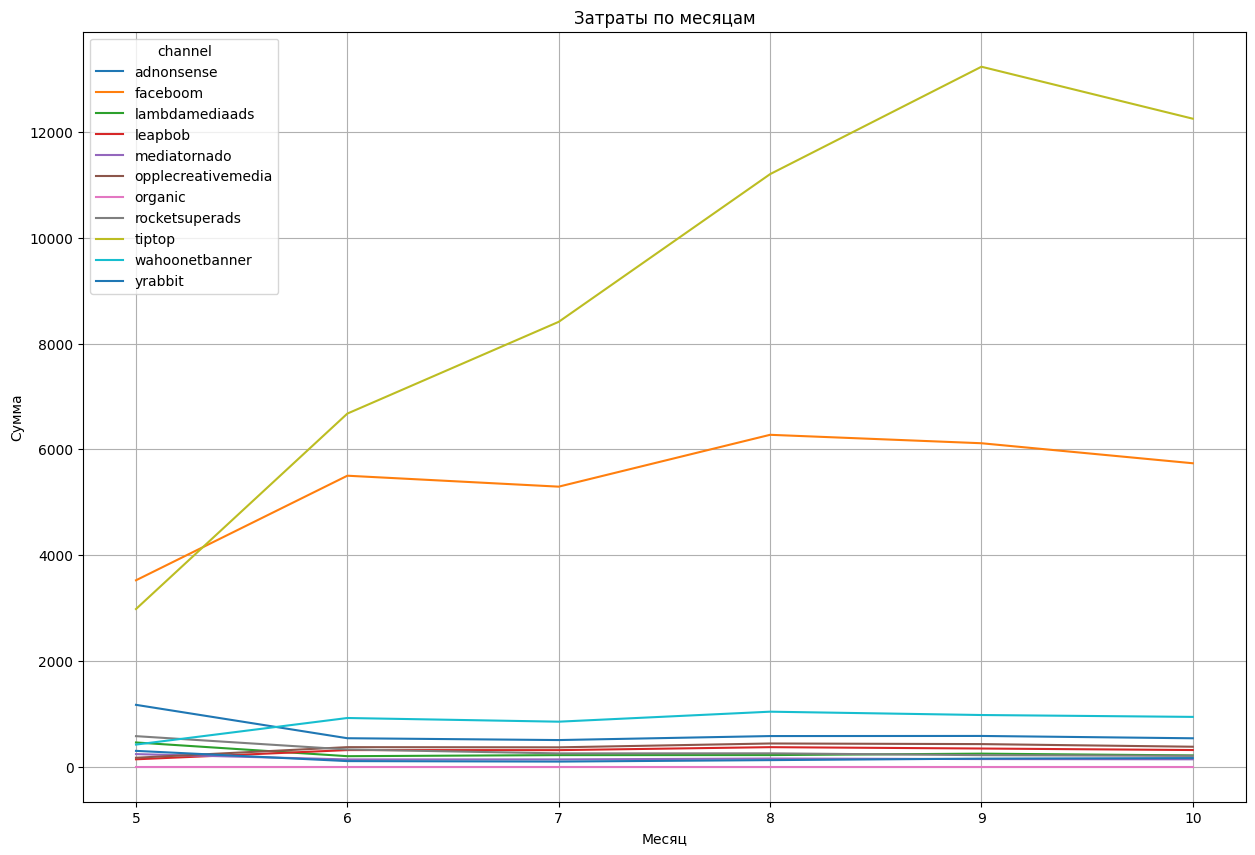

In [18]:
channel_cac = (profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')
                .sort_values(by='acquisition_cost', ascending=False)
              )


display(channel_cac)

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(15,10))
plt.ylabel('Сумма')
plt.xlabel('Месяц')
plt.title('Затраты по месяцам')
plt.show()

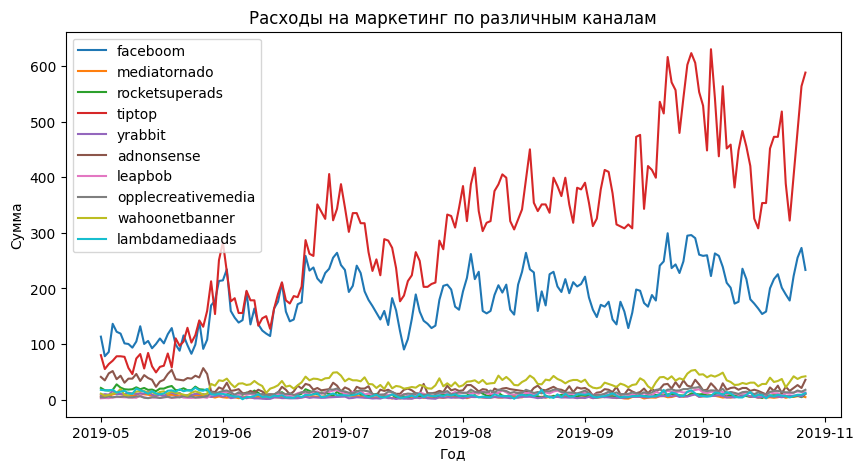

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=costs, x='dt', y='costs', hue='channel')
plt.title('Расходы на маркетинг по различным каналам')
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.legend()
plt.show()

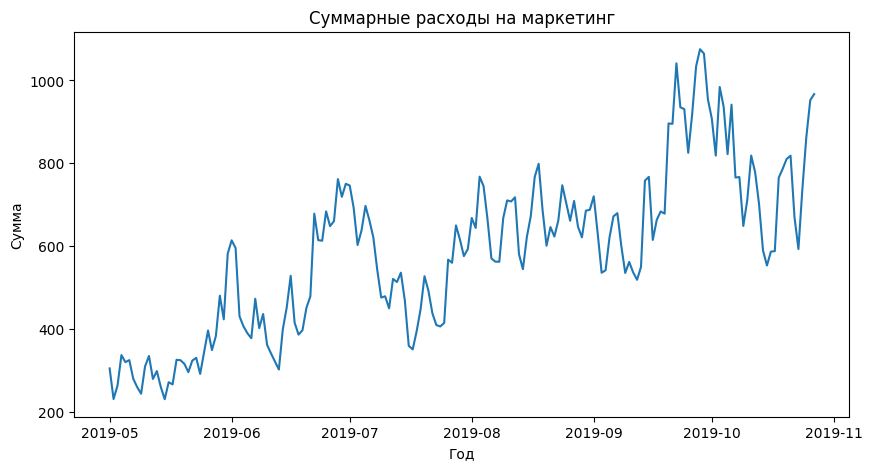

In [20]:
sum_costs = costs.pivot_table(index='dt', values='costs', aggfunc='sum')

plt.figure(figsize=(10,5))
sns.lineplot(data=sum_costs, x='dt', y='costs')
plt.title('Суммарные расходы на маркетинг')
plt.xlabel('Год')
plt.ylabel('Сумма')
plt.show()

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Построим графики LTV, ROI и их динамики:

In [21]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

profiles = profiles.query('channel != "organic"')

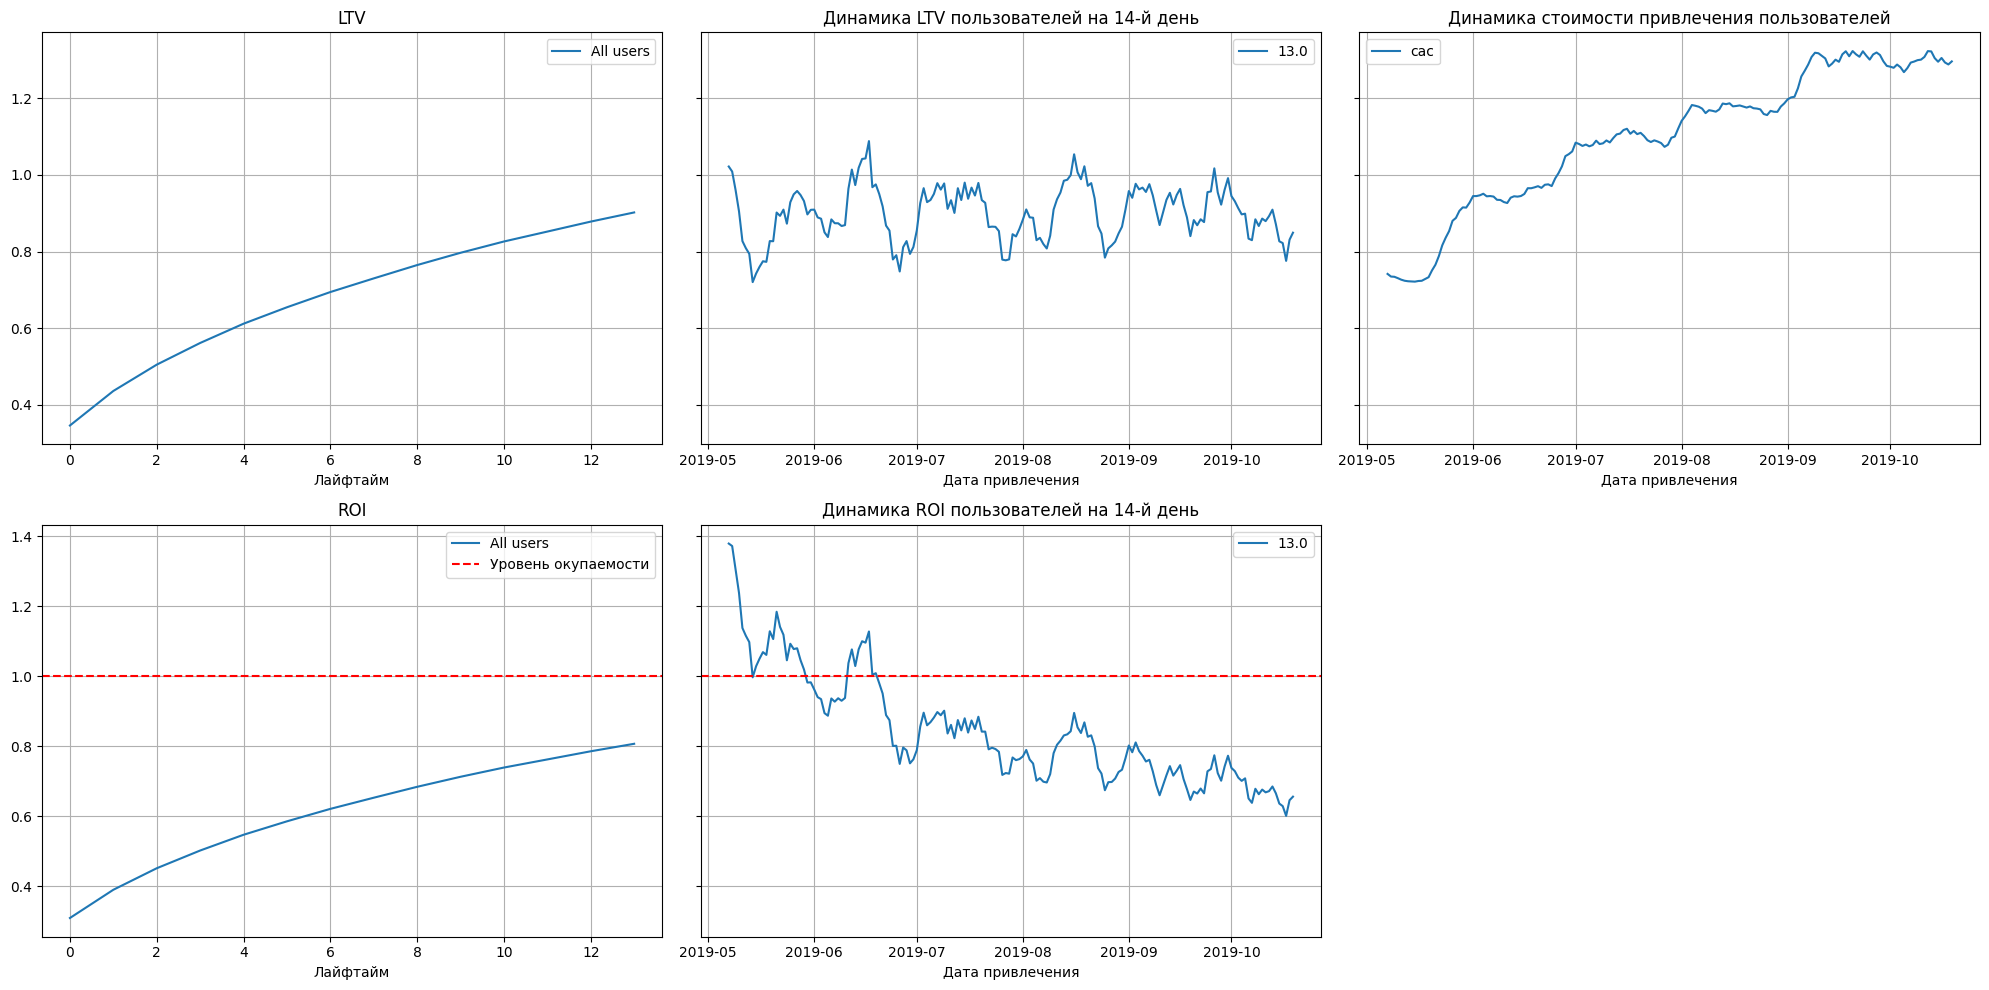

In [22]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам видно, что вложения в рекламу значительно выросли с июня 2019, что помогло повлекло за собой рост показателей LTV среди пользователей. Однако, также очевидно и то, что расходы на рекламу не окупаются - это можно увидеть на графиках показателей 
ROI. Для того, чтобы понять, в чем скрывается причина низкой окупаемости, нужно рассмотреть данные более детально.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

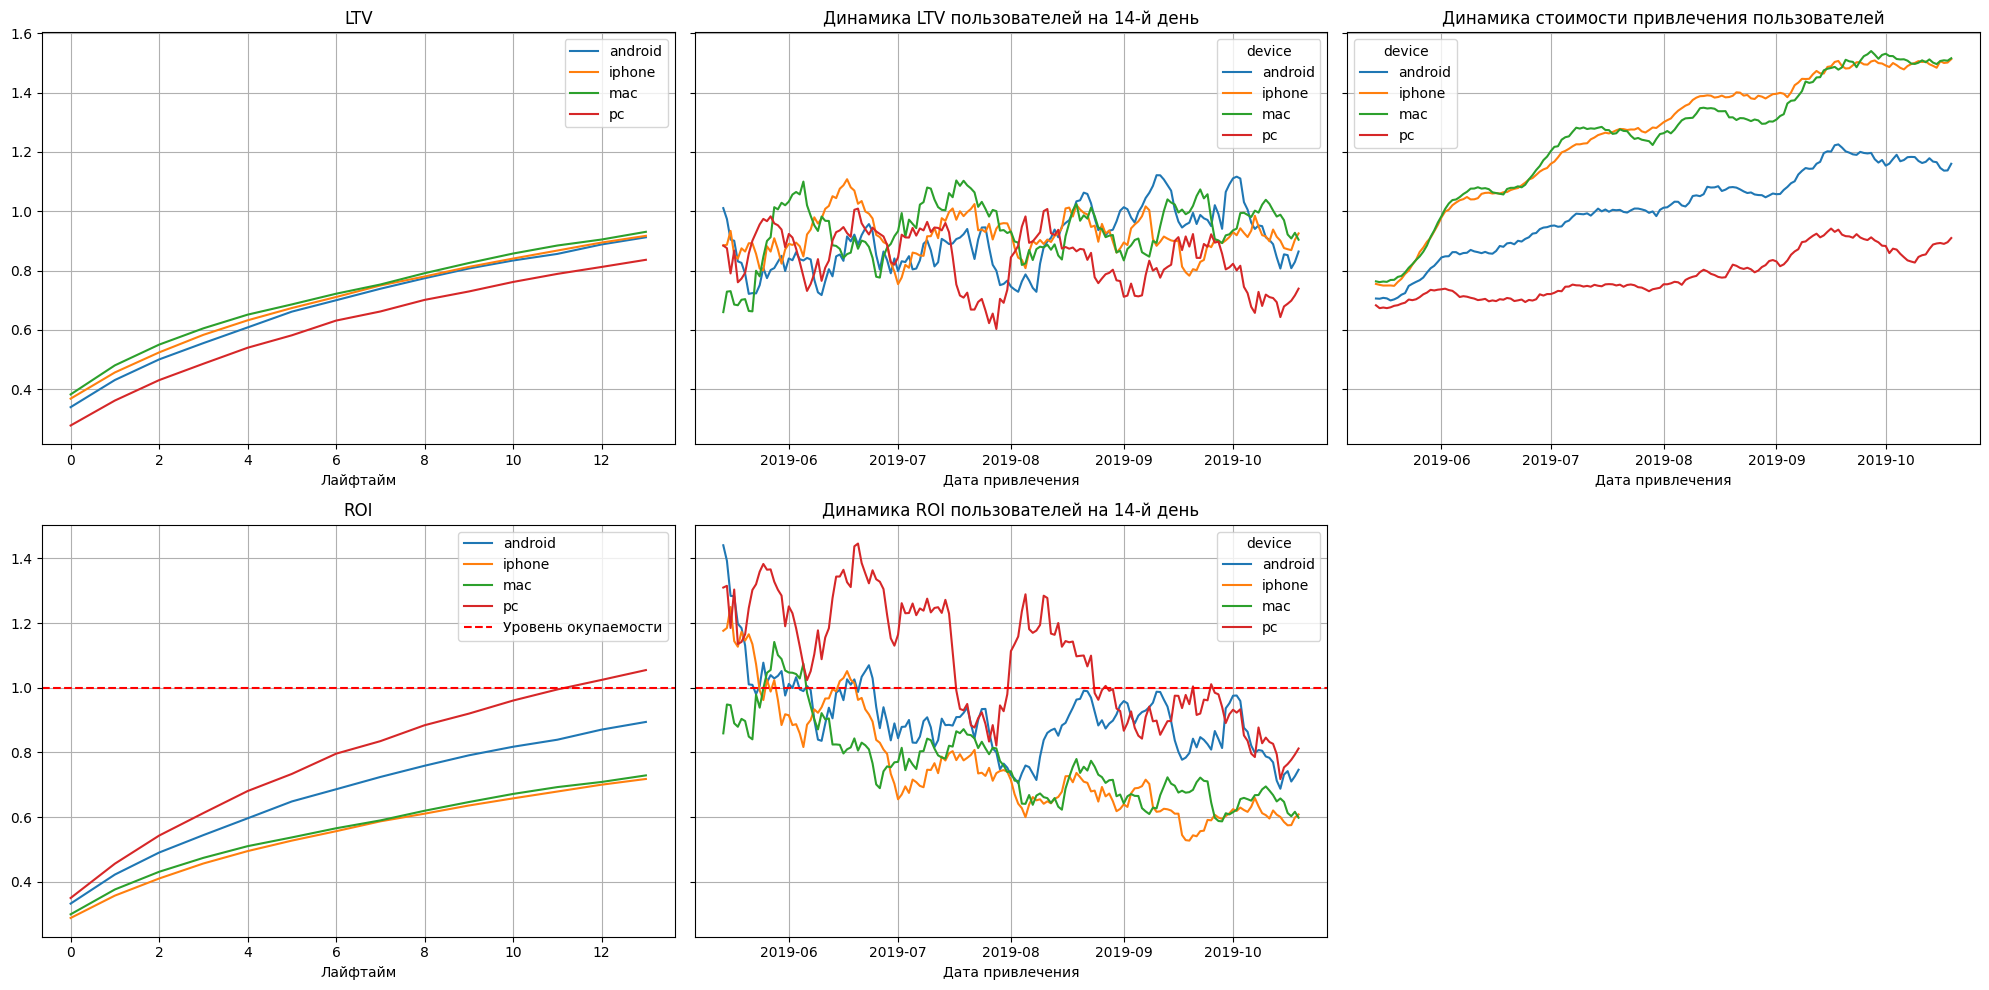

In [23]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

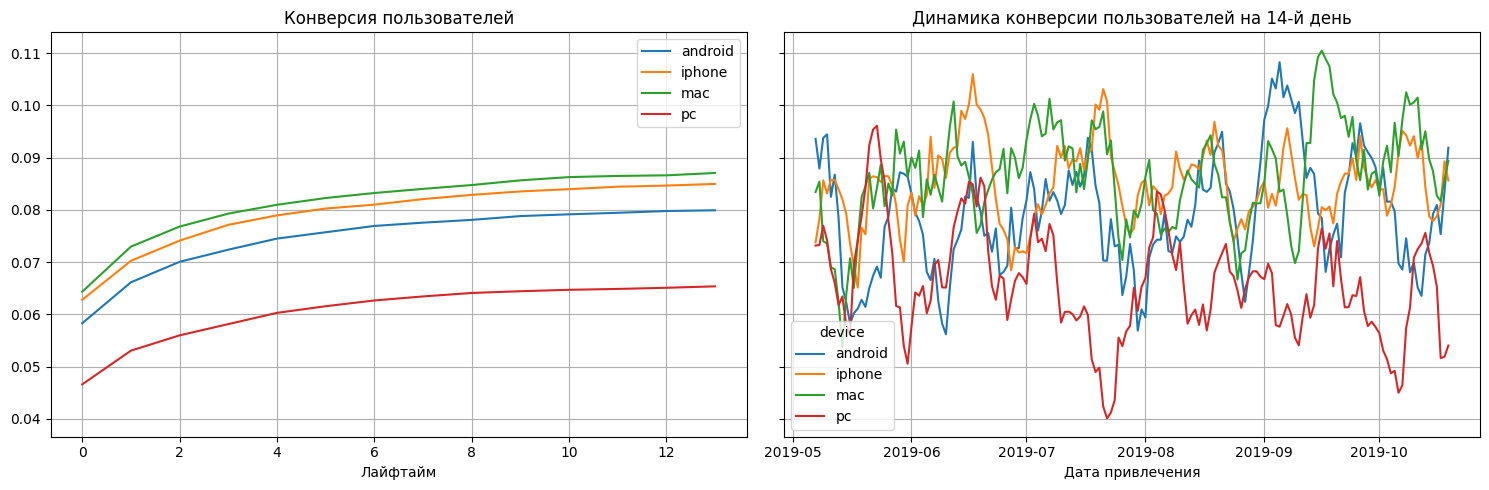

In [24]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

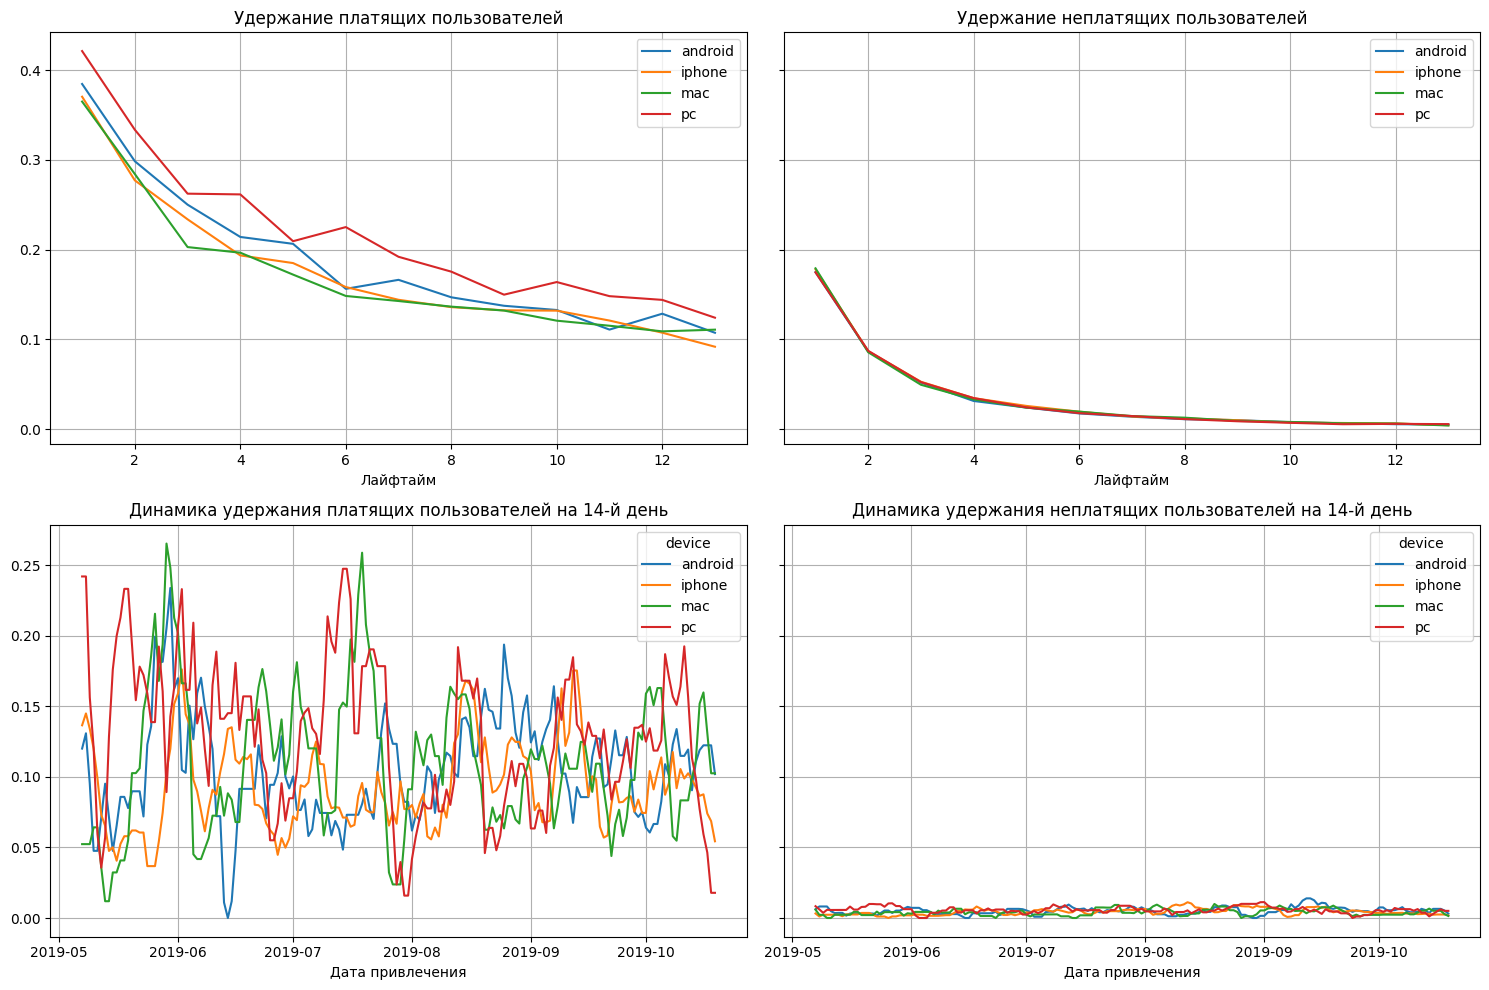

In [25]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Посмотрев на эти графики, можно сказать следующее - наибольшие суммы денег тратятся на продвижение рекламы для устройств Apple (iPhone, Mac), на втором месте устройства на Android, на последнем - ПК. И действительно, пользователи этих прех устройств стали приносить несколько больше денег, чем пользователи пк, которых, однако, не хватает на то, чтобы окупить рекламные расходы для этих устройств. По графика ROI видно, что ПК окупает себя примерно с конца первой недели, Андроид -  примерно с одиннадцатого дня. ПК - единственное устройство, по которому уверенно можно сказать, что оно окупает себя - и его падение на графике динамики ROI выглядит менее серьезным.

### Проанализируйте окупаемость рекламы с разбивкой по странам

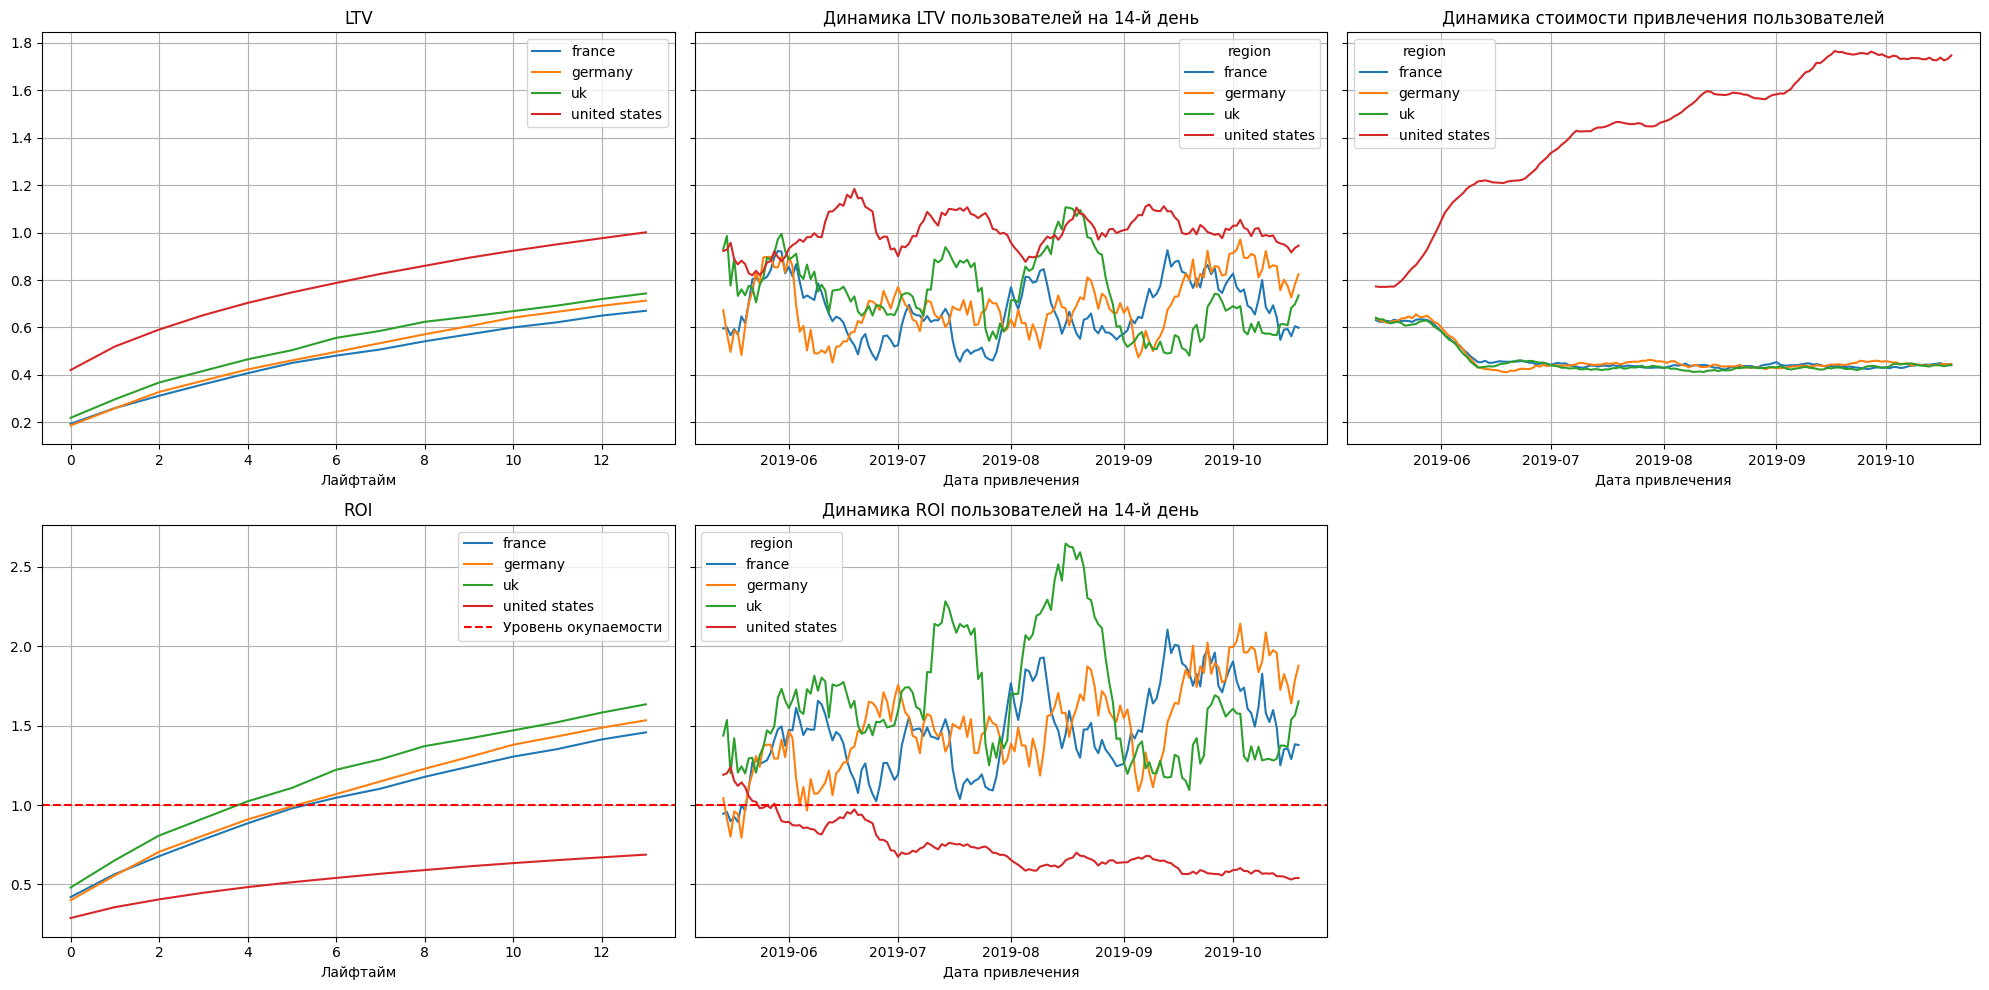

In [26]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

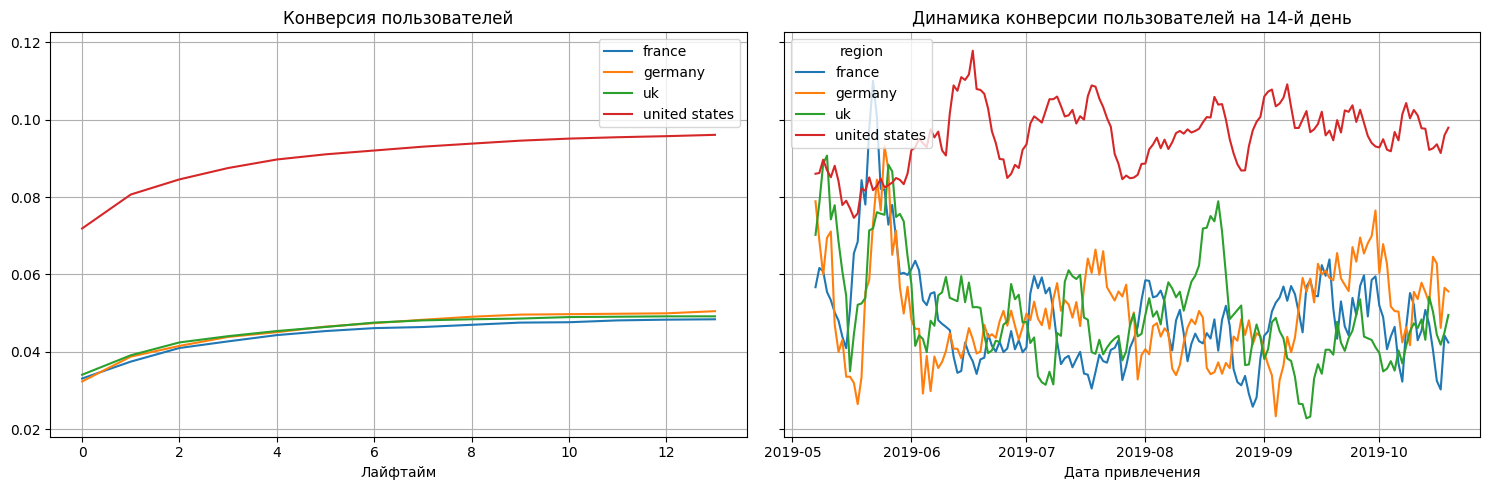

In [27]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

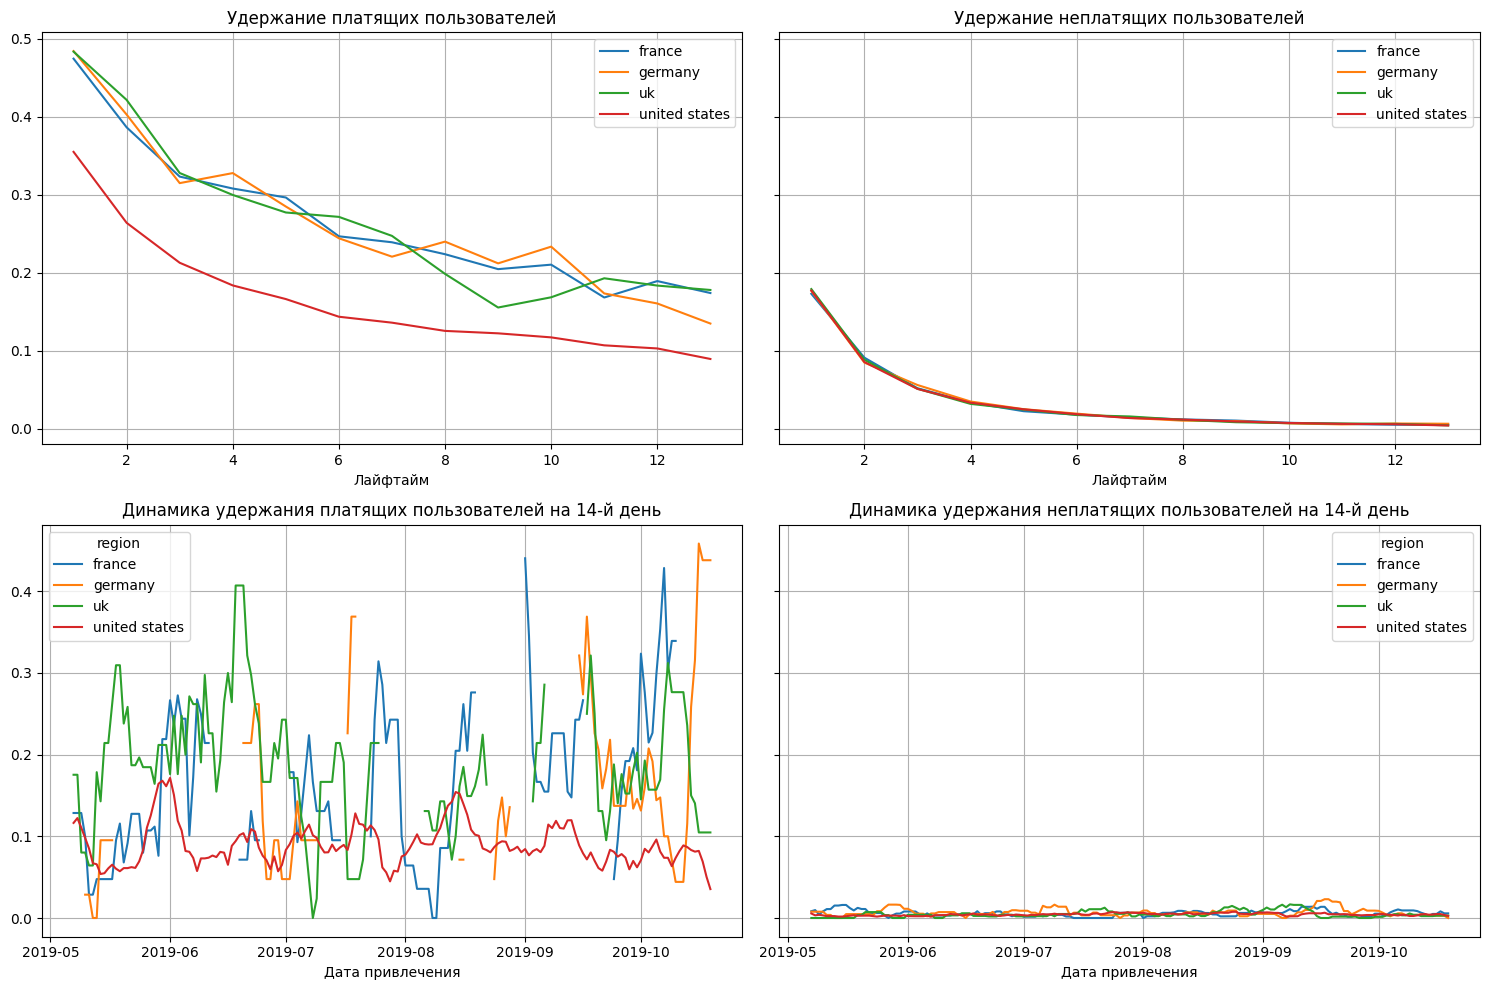

In [28]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А вот и одна из возможных причин убытков - огромное количество средств было вложено в рекламные кампании в США, и эти затраты были несоразмерны LTV пользователей из США. Остальные же страны, как можно заметить, вполне успешно окупают себя.
Как можно заметить из графиков конверсии и удержания, пользователи из США вполне охотно конвертируются, однако, удерживаются хуже всех.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

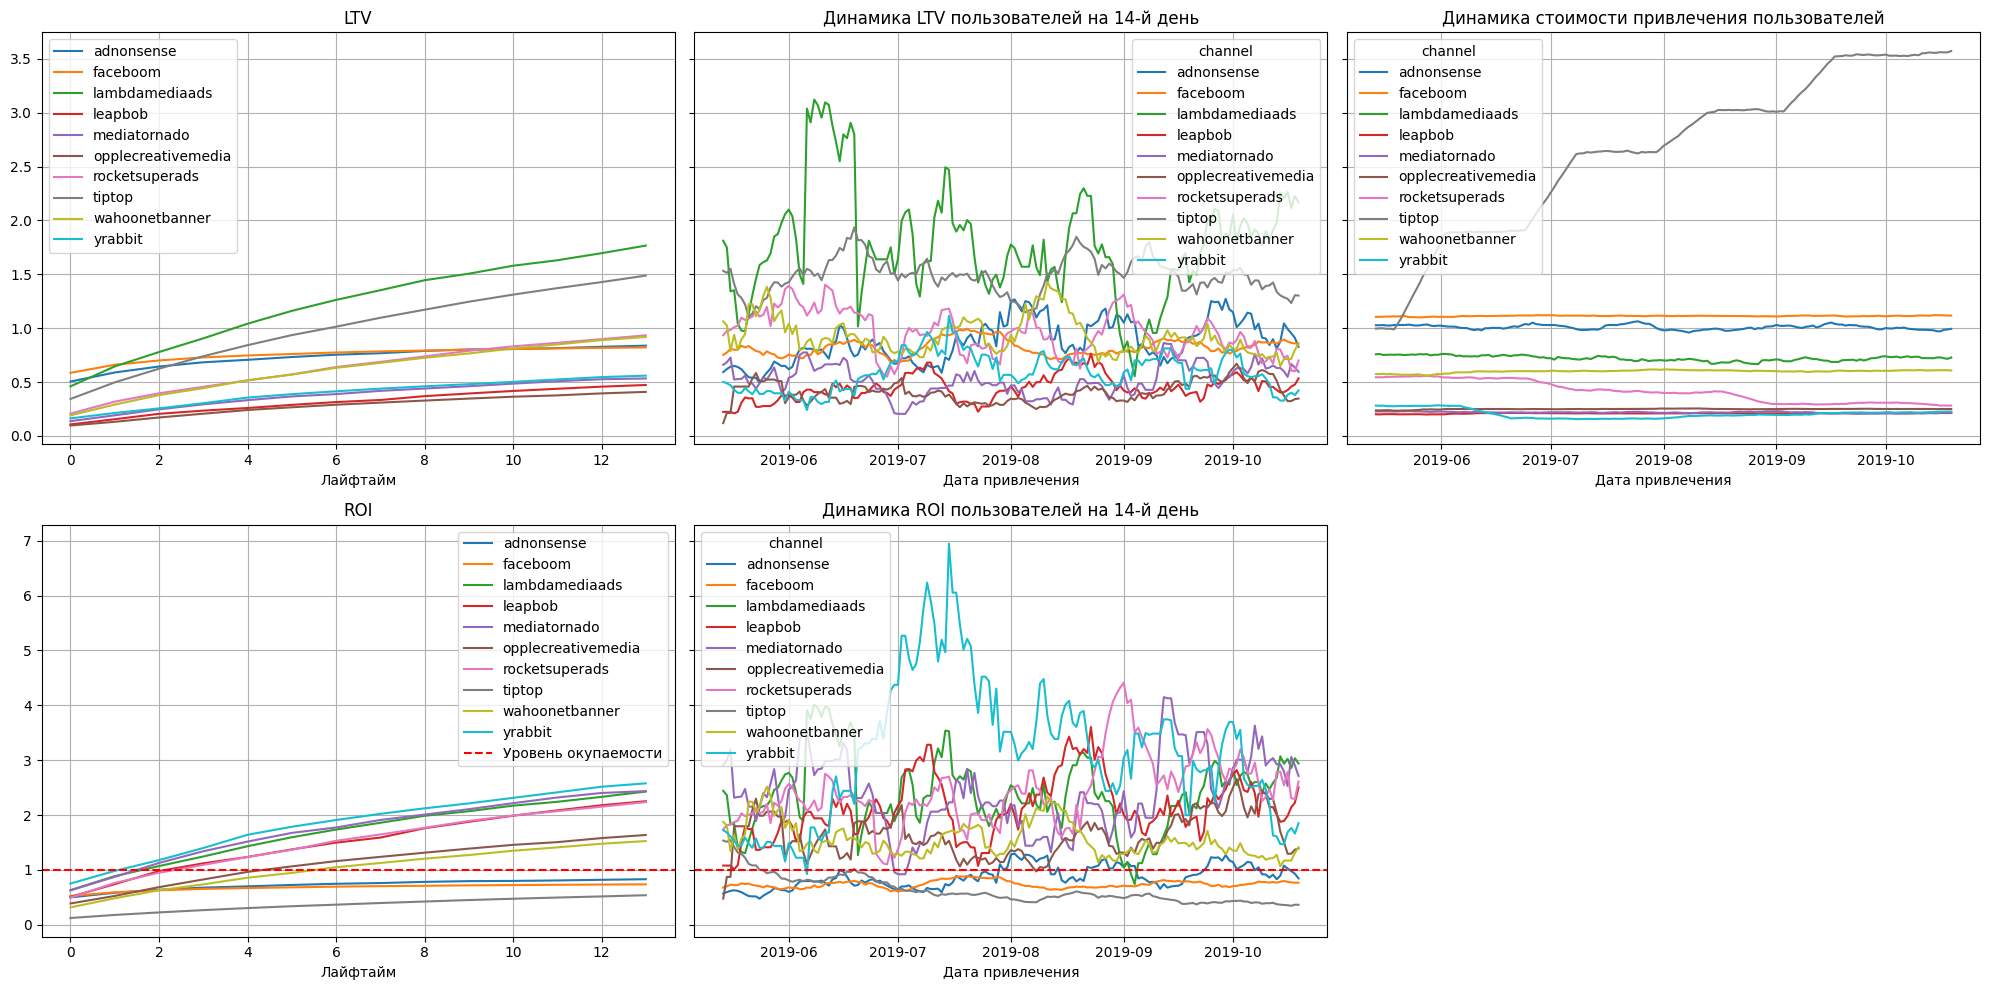

In [29]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

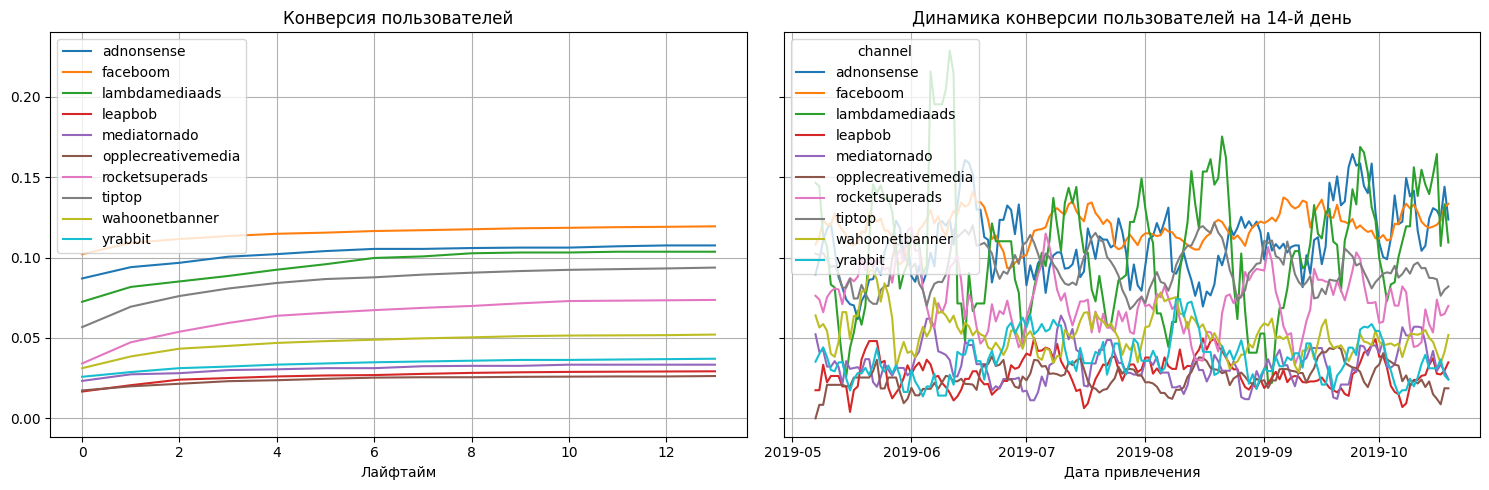

In [30]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

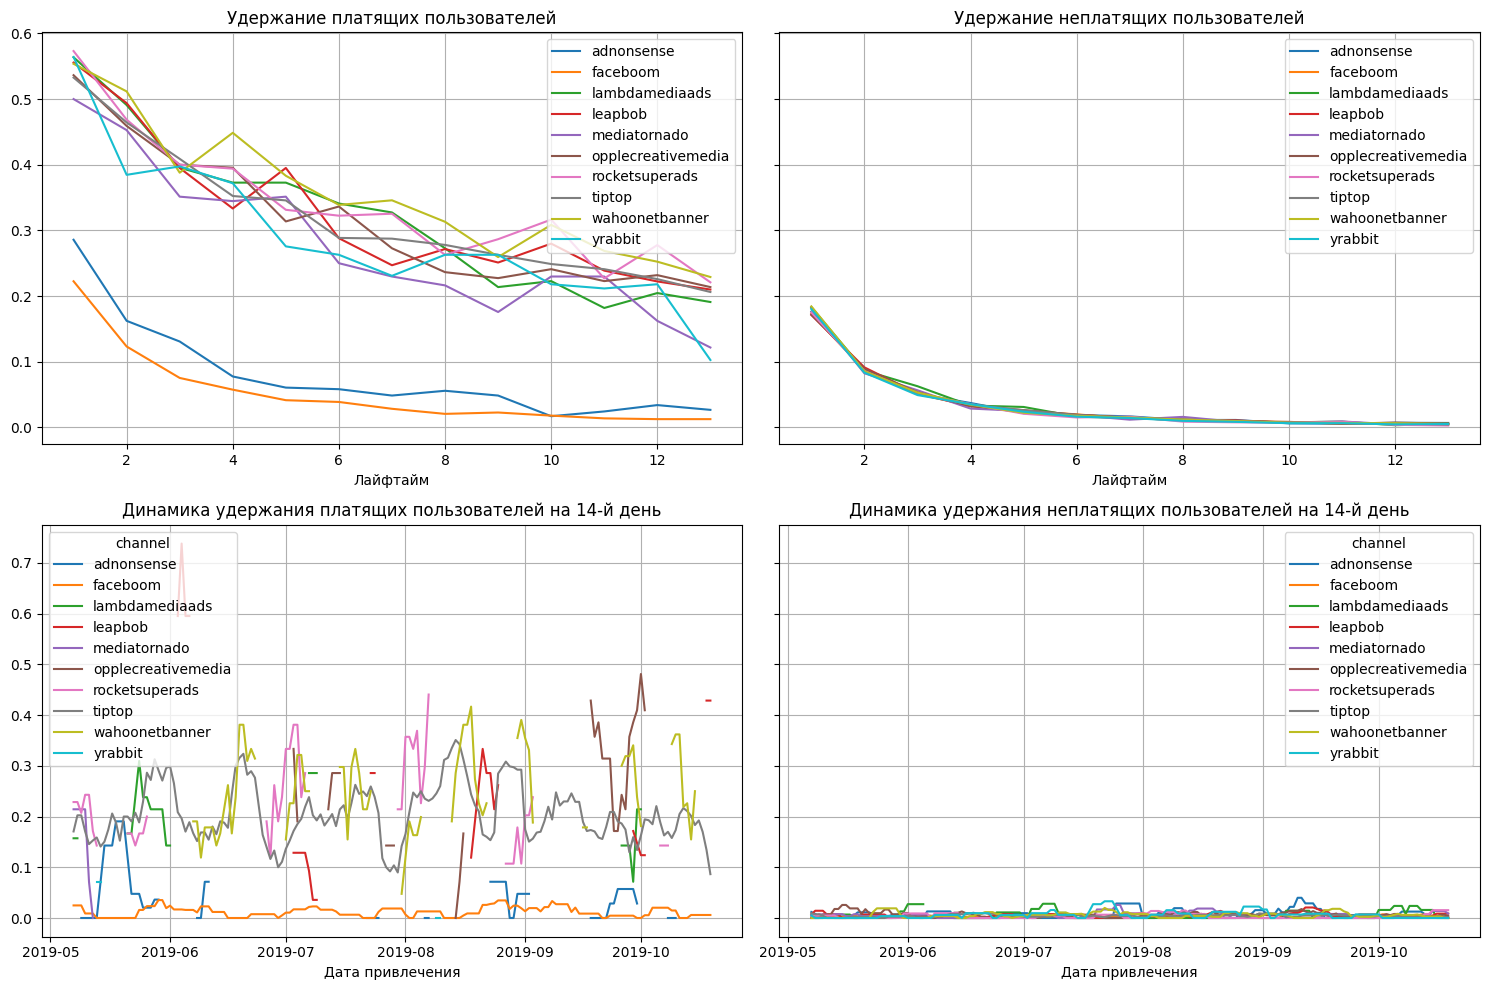

In [31]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Здесь наблюдается ситуация, похожая на предыдущую - основная часть средств ушла на раскачку канала ТипТоп - а он не то что не окупил себя, так и вовсе стал откровенно убыточным (наряду с Faceboom и Adnonsense).

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

Итак, увидев и изучив информацию выше, можно выделить следующие возможные причины убыточности рекламных кампаний:
* огромная часть средств ушла на рекламу в США, и, несмотря на неплохие показатели LTV, такие колоссальные расходы не смогли окупиться;
* аналогичная ситуация наблюдается и с каналом ТипТоп - траты на продвижение несоразмерны выручке.

И, как следствие, рекомендации для улучшения показателей будут следующими:
* сократить кольчество рекламных средств для США и перенаправить их на другие рынки, имеющие перспективыне показатели (в Германии, например, довольно хороший процент платящих пользователей и достаточно низкая стоимость привлечения);
* если есть желание развивать именно рынок США, то тогда нужно пересмотреть качество самой рекламы, ее актуальность для пользователей данного конкретного региона, проверить, нет ли каких-либо несовместимостей в техническом, юридическом плане или же на уровне менталитета - иными словами, пересмотреть текущую рекламную кампанию и проверить ее (и само приложение) на наличие различных багов;
* также, стоит обратить внимание на качество самой рекламы и приложения для устройств Apple - возможно, причиной резкого падения показателей стали баги в обновлении, неудобная форма регистрации, неудачный дизайн и тд: нужно посмотреть, какие изменения произошли с июня 2019 года и проанализировать их;
* с каналами все несколько сложнее - ведь человек, увидев рекламу в одном месте, не всегда переходит к приложению именно по этому каналу - например, увидев рекламу в ТипТоп, пользователь может сделать скриншот с названием приложения и найти его позже через браузер или непосредственно магазин приложений, и что-то однозначно сказать по этому поводу физически невозможно; поэтому, на мой взгляд, в последнюю очередь стоит заниматься перераспределением бюджета по каналам, поскольку они являются наименее предсказуемыми параметрами для анализа из всех;
* в качестве альтернативного канала можно рассмотреть, например, lambdamediaads - этот канал обладает хорошими показателями конверсии, удержания и окупаемости.
